In [5]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam



In [6]:
PATH = os.getcwd()
# Define data path
data_path ='C:/TensorFlow/vgg16/train'
data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1
num_epoch=20

# Define the number of classes
num_classes = 5

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)


Loaded the images of dataset-Adult_leaf

Loaded the images of dataset-Child_leaf

Loaded the images of dataset-Defect_leaf

Loaded the images of dataset-Insect

Loaded the images of dataset-Perfect_leaf

(2600, 128, 128)


In [7]:
if num_channel==1:
    if K.image_dim_ordering()=='tf':
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
        


(2600, 128, 128, 1)


C:\Users\Hasibul Hasan\AppData\Local\conda\conda\envs\evn\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
	# using sklearn for preprocessing
	from sklearn import preprocessing
	
	def image_to_feature_vector(image, size=(128, 128)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()
	
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_flatten=image_to_feature_vector(input_img,(128,128))
			img_data_list.append(input_img_flatten)
	
	img_data = np.array(img_data_list)
	img_data = img_data.astype('float32')
	print (img_data.shape)
	img_data_scaled = preprocessing.scale(img_data)
	print (img_data_scaled.shape)
	
	print (np.mean(img_data_scaled))
	print (np.std(img_data_scaled))
	
	print (img_data_scaled.mean(axis=0))
	print (img_data_scaled.std(axis=0))
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)

In [9]:
if USE_SKLEARN_PREPROCESSING:
	img_data=img_data_scaled
#%%
# Assigning Labels

# Define the number of classes
num_classes = 6

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:325]=0
labels[325:1100]=1
labels[1100:1675]=2
labels[1675:1800]=3
labels[1800:]=4
	  
names = ['adult','child','defect','insect','perfect']
	  
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [10]:
from sklearn.model_selection import train_test_split
x,y = shuffle(img_data,Y, random_state=1)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [11]:
input_shape=img_data[0].shape
					
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [12]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
__________

True

In [13]:
hist = model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 2080 samples, validate on 520 samples
Epoch 1/20
2080/2080 [==============================] - 122s 59ms/step - loss: 1.4803 - acc: 0.3750 - val_loss: 1.1714 - val_acc: 0.5519
Epoch 2/20
2080/2080 [==============================] - 101s 48ms/step - loss: 1.2567 - acc: 0.4841 - val_loss: 1.0761 - val_acc: 0.5404
Epoch 3/20
2080/2080 [==============================] - 130s 62ms/step - loss: 1.1319 - acc: 0.5409 - val_loss: 0.9363 - val_acc: 0.6154
Epoch 4/20
2080/2080 [==============================] - 103s 50ms/step - loss: 0.9742 - acc: 0.5947 - val_loss: 0.7684 - val_acc: 0.6731
Epoch 5/20
2080/2080 [==============================] - 131s 63ms/step - loss: 0.8285 - acc: 0.6524 - val_loss: 0.6649 - val_acc: 0.7327
Epoch 6/20
2080/2080 [==============================] - 105s 50ms/step - loss: 0.6959 - acc: 0.7236 - val_loss: 0.5651 - val_acc: 0.7731
Epoch 7/20
2080/2080 [==============================] - 130s 62ms/step - loss: 0.5808 - acc: 0.7764 - val_loss: 0.4996 - val_acc: 0

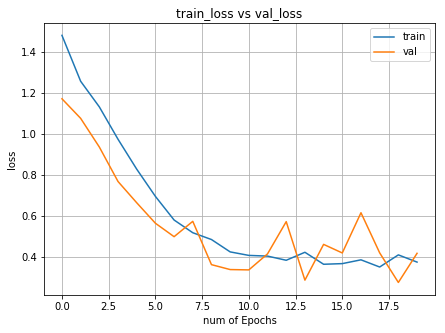

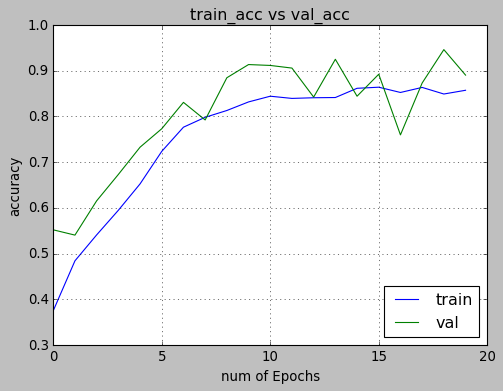

In [14]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(20)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [15]:
# Testing a new image
test_image = cv2.imread('C:/TensorFlow/vgg16/test/defect/0_2.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
test_image= np.expand_dims(test_image, axis=3) 
test_image= np.expand_dims(test_image, axis=0)
print (test_image.shape)
		

		
# Predicting the test image
#print((model.predict(test_image)))
print(model.predict_classes(test_image))

a = model.predict_classes(test_image)

if a==[0]:
    print("Adult_tea_leaf")
elif a==[1]:
    print("Child_tea_leaf")
elif a==[2]:
    print("Defect_tea_leaf")
elif a==[3]:
    print("Insect")
elif a==[4]:
    print("Perfect_tea_leaf")


(128, 128)
(1, 128, 128, 1)


C:\Users\Hasibul Hasan\AppData\Local\conda\conda\envs\evn\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # Remove the CWD from sys.path while we load stuff.


[2]
Defect_tea_leaf


(1, 1, 126, 126, 32)
(126, 126, 32)
(126, 126, 32)


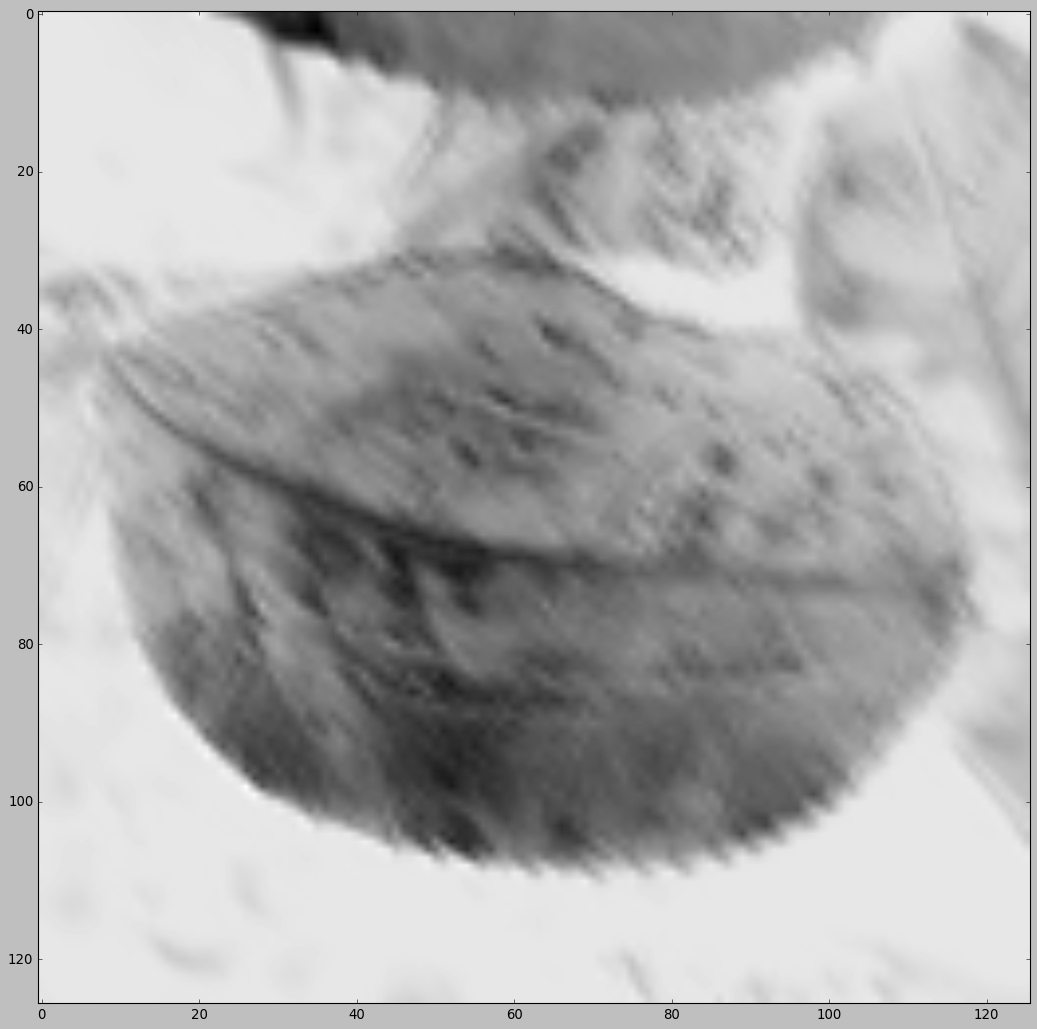

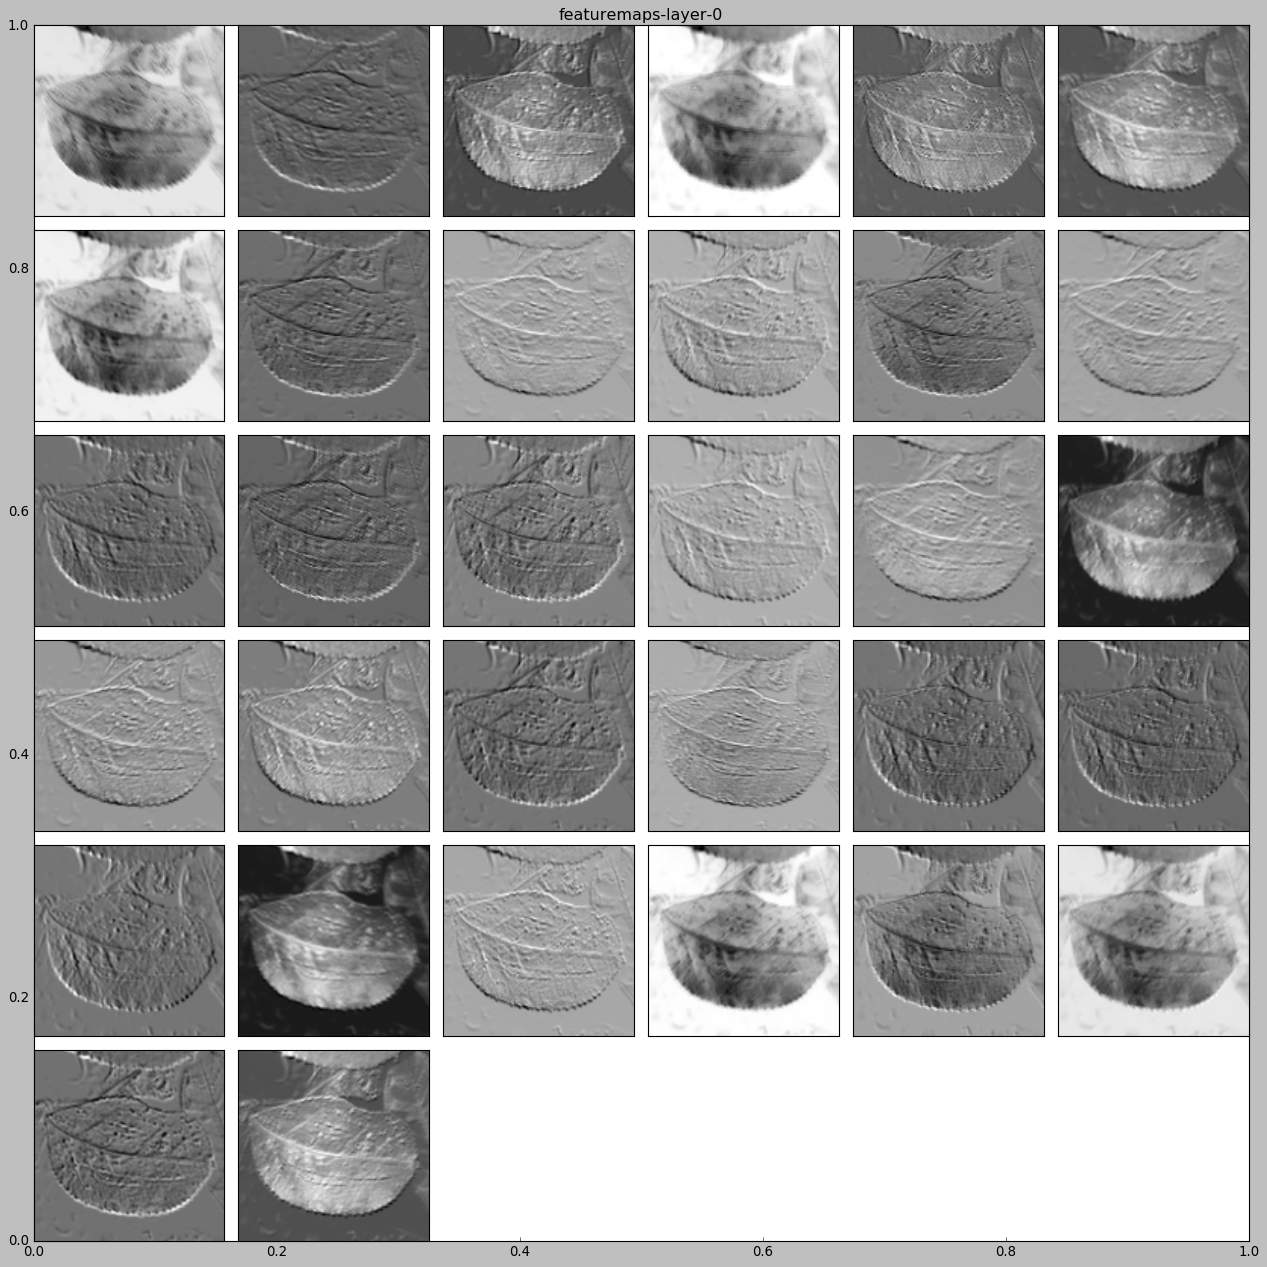

In [16]:
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=0
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')


In [17]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(adult)', 'class 1(child)', 'class 2(defect)','class 3(insect)', 'class 4(perfect)']

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))




[[ 50   1   7   0   5]
 [  0 150   2   0   2]
 [  0   0 111   0   6]
 [  0   0   9  14   0]
 [  0   2  23   0 138]]
                  precision    recall  f1-score   support

  class 0(adult)       1.00      0.79      0.88        63
  class 1(child)       0.98      0.97      0.98       154
 class 2(defect)       0.73      0.95      0.83       117
 class 3(insect)       1.00      0.61      0.76        23
class 4(perfect)       0.91      0.85      0.88       163

       micro avg       0.89      0.89      0.89       520
       macro avg       0.92      0.83      0.86       520
    weighted avg       0.91      0.89      0.89       520



Confusion matrix, without normalization
[[ 50   1   7   0   5]
 [  0 150   2   0   2]
 [  0   0 111   0   6]
 [  0   0   9  14   0]
 [  0   2  23   0 138]]


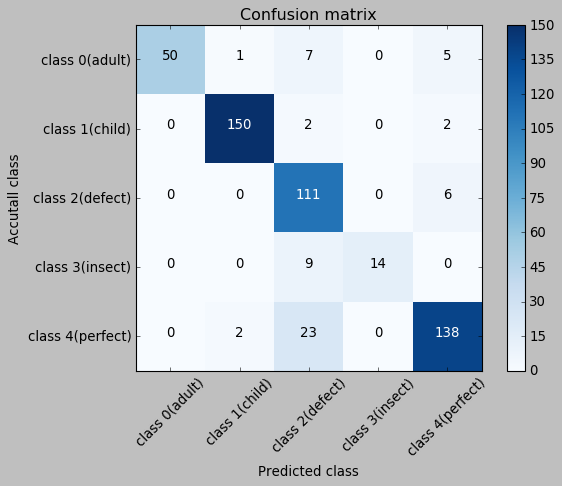

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Accutall class')
    plt.xlabel('Predicted class')
    
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()

In [13]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')


Saved model to disk
Loaded model from disk


In [19]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

NameError: name 'loaded_model' is not defined